In [ ]:
import pandas as pd
import sys

accident = pd.read_csv('dftRoadSafety_Accidents_2016.csv')
casualty = pd.read_csv('Cas.csv')
vehicle = pd.read_csv('MakeModel2016.csv')

pd.set_option('display.max_columns', 70)

In [ ]:
main = pd.merge(accident, casualty, on=['Accident_Index'])
main.head()

In [ ]:
major = pd.merge(main, vehicle, on=['Accident_Index'])
major.head()

## Deriving "Number of Car Occupants"

In [ ]:
major['Car_Passenger'].unique()

In [ ]:
major_2 = major.loc[lambda major: major.Casualty_Class <=2, :]

In [ ]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq], axis=1, keys=['Total', 'Percent','Nunique'])
    display(quality_df)

In [ ]:
def box_plot(col):
    """
    Description : Gives box plot for features in the dataframe passed
    Argument : Dataframe
    """
    for col in fourth.columns:
        if fourth[col].dtype != 'object':
            print(fourth[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.boxplot(fourth[col].dropna())
            plt.tight_layout()
            plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Question 4

### Are certain cars more accident prone than the others

In [ ]:
third = major_2[['Vehicle_Type', 'Age_of_Vehicle','make','model', 'Number_of_Casualties']]

In [ ]:
third.head()

In [ ]:
third['Vehicle_Type'].nunique

In [ ]:
fourth = third.loc[(third['Vehicle_Type'].isin([8,9])) & (third['make'])]
#where 8 and 9 indicate car vehicle type

In [ ]:
#box_plot(fourth)

In [ ]:
fourth['make'].value_counts()

In [ ]:
fourth.head()

In [ ]:
quality_report(fourth)

In [ ]:
fourth.corr()

In [ ]:
fourth.groupby('make')['Number_of_Casualties'].count().sort_values(ascending=False)

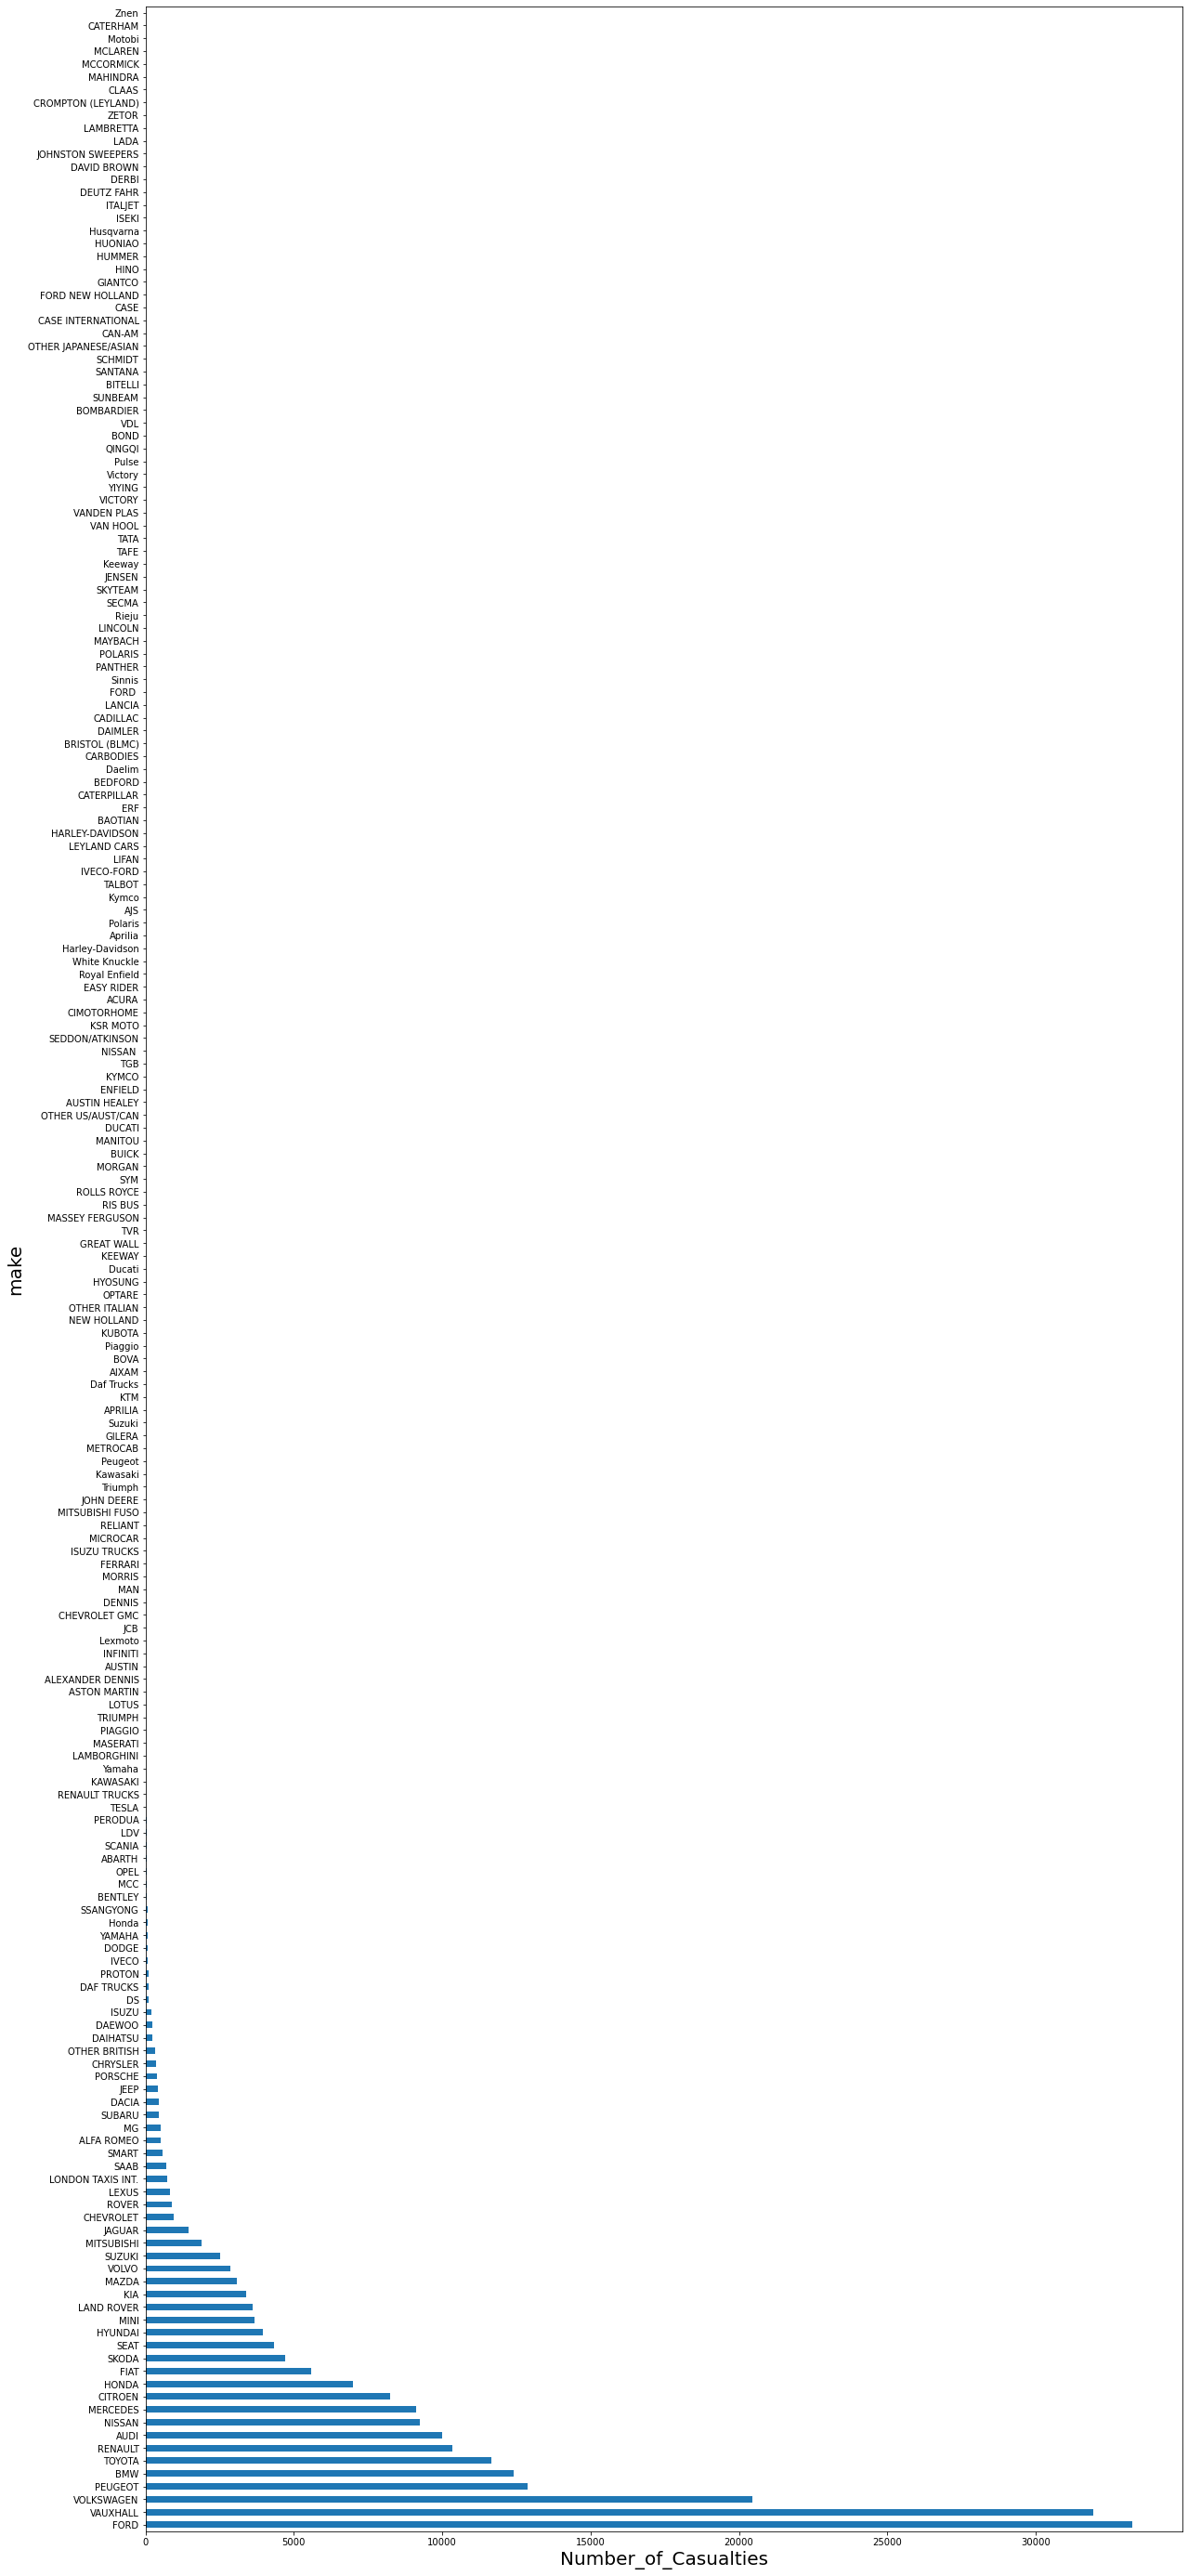

In [68]:
plt.figure(figsize = (20,50))
plt.tight_layout()
plt.xlabel('Number_of_Casualties', fontsize =20)
plt.ylabel('make', fontsize =20)
fourth.groupby('make')['Number_of_Casualties'].count().sort_values(ascending=False).plot(kind='barh')

### Taking a closer look at Cars from by randomly visualizing cars with the minimum of 836 No. of Casualties 

In [72]:
final = fourth.loc[(fourth['make'].isin(['FORD','VAUXHALL','VOLKSWAGEN','PEUGEOT','BMW','TOYOTA','RENAULT', 'AUDI', 'NISSAN', 'MERCEDES', 'CITROEN', 'HONDA', 'FIAT', 'SKODA', 'SEAT', 'HYUNDAI', 'MINI', 'LAND ROVER', 'KAI', 'MAZDA', 'VOLVO', 'SUZUKI', 'MITSUBISHI', 'JAGUAR', 'CHEVROLET', 'ROVER', 'LEXUS']))]

In [77]:
final.groupby('make')['Number_of_Casualties'].count().sort_values(ascending=False)

make
FORD          33268
VAUXHALL      31953
VOLKSWAGEN    20444
PEUGEOT       12884
BMW           12414
TOYOTA        11665
RENAULT       10353
AUDI          10009
NISSAN         9254
MERCEDES       9132
CITROEN        8240
HONDA          6983
FIAT           5575
SKODA          4699
SEAT           4319
HYUNDAI        3963
MINI           3670
LAND ROVER     3609
MAZDA          3070
VOLVO          2872
SUZUKI         2514
MITSUBISHI     1890
JAGUAR         1458
CHEVROLET       938
ROVER           879
LEXUS           836
Name: Number_of_Casualties, dtype: int64

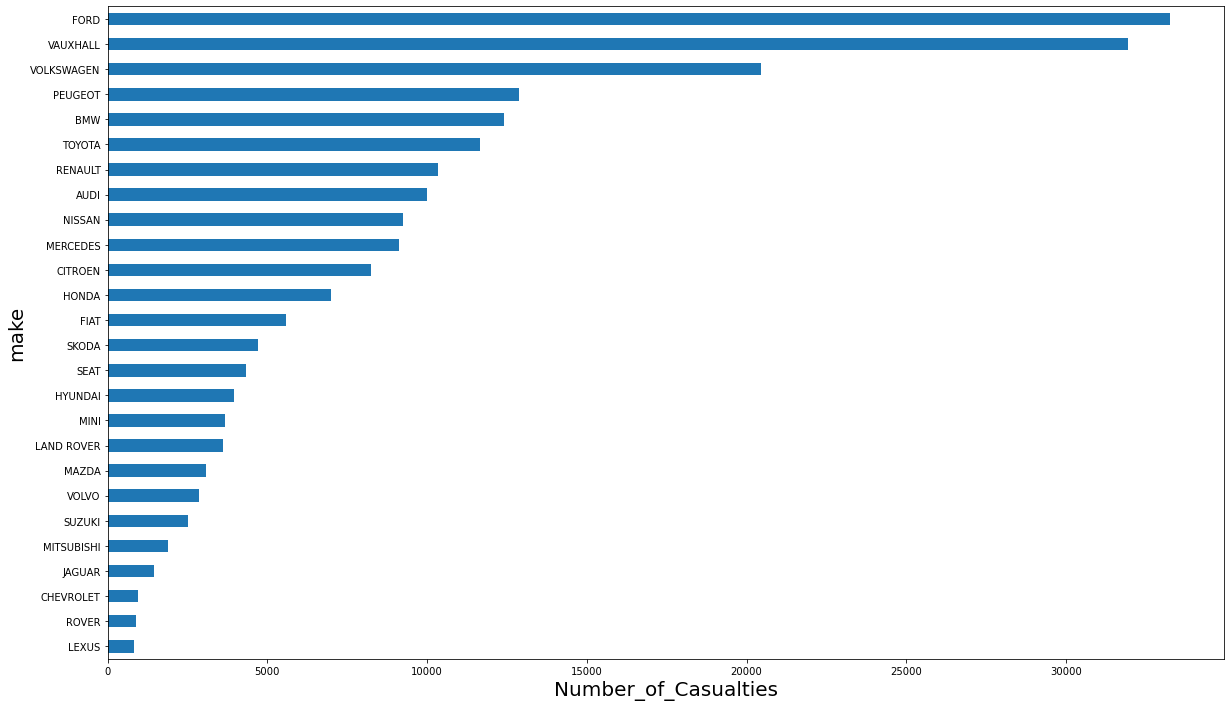

In [78]:
plt.figure(figsize = (20,12))
plt.tight_layout()
plt.xlabel('Number_of_Casualties', fontsize =20)
plt.ylabel('make', fontsize =20)
final.groupby('make')['Number_of_Casualties'].count().sort_values(ascending=True).plot(kind='barh')

### From the above plot we can see that FORD vehicles are more pron to accidents with VAUXHALL coming second followed by VOLKSWAGEN